<h2>Students Percentage Prediction</h2>

<b>*Importing required libraries*</b>

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<b>*Importing the dataset*</b>

In [25]:
df = pd.read_csv('Student_study_hours.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [26]:
df.shape

(25, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


<b>*Cleaning the data*</b>

In [28]:
print("Number of missing values in the dataset :\n")
print(df.isnull().sum())

Number of missing values in the dataset :

Hours     0
Scores    0
dtype: int64


In [29]:
df.duplicated().sum()

0

In [30]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

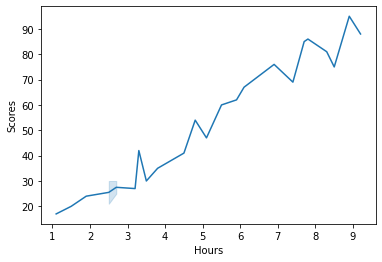

In [31]:
sns.lineplot(x="Hours",y="Scores",data=df)

In [32]:
x=np.array(df["Hours"]).reshape(-1,1)
y=np.array(df["Scores"])

<b>Training the given dataset</b>

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
score=LinearRegression()
score.fit(x_train,y_train)

LinearRegression()

In [37]:
print(score.coef_)

[9.91065648]


In [38]:
print(score.intercept_)

2.018160041434669


<b>Regression graph</b>

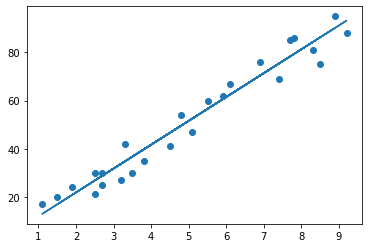

In [39]:
regline = (score.coef_*x)+(score.intercept_)
plt.scatter(x,y)
plt.plot(x,regline)
plt.show()

In [43]:
y_prediction=score.predict(x_test)
df=pd.DataFrame({"Actual score":y_test,"Predicted score":y_prediction})
print(df)

   Actual score  Predicted score
0            20        16.884145
1            27        33.732261
2            69        75.357018
3            30        26.794801
4            62        60.491033


<b>Results</b>

In [44]:
hours = [[9.25]]
p_score=score.predict(hours)
print("If the study hours is 9.25, then the percentage of mark is",p_score)

If the study hours is 9.25, then the percentage of mark is [93.69173249]


<b>Accuracy of Prediction</b>

In [46]:
accuracy=score.score(x_test,y_test)
print("The accuracy of the applied model is",accuracy*100)

The accuracy of the applied model is 94.54906892105355
